# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [73]:
from commonfunctions import *
import scipy.ndimage as nd
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

<ipython-input-28-e16a24087cde>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('circuit.tif'))


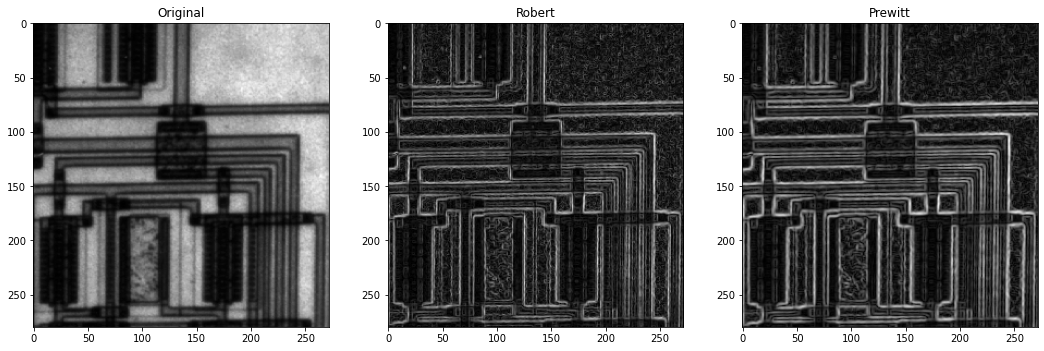

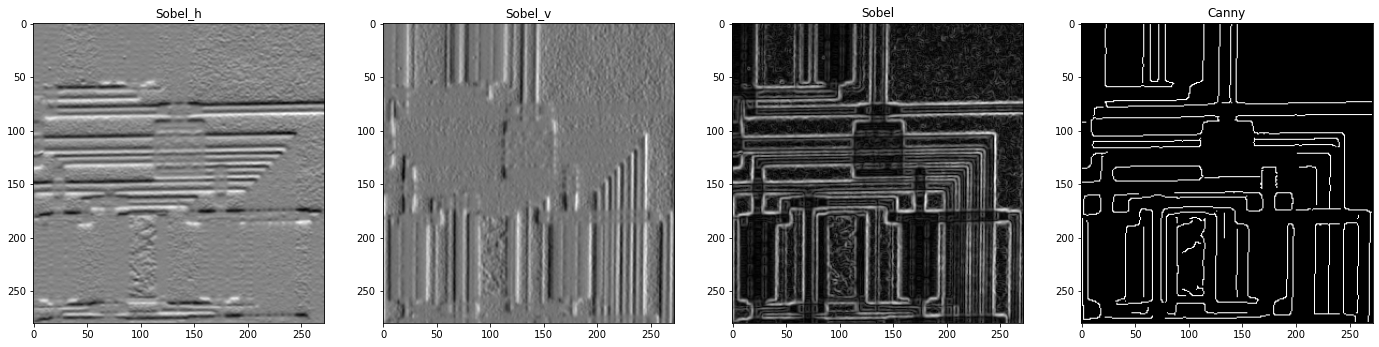

In [28]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

img = rgb2gray(io.imread('circuit.tif'))

imgRobert = roberts(img)

imgPrewitt = prewitt(img)

imgSobelH = sobel_h(img)

imgSobelV = sobel_v(img)

imgSobel = sobel(img)

imgCanny = canny(img, sigma=2)


show_images([img, imgRobert, imgPrewitt], ["Original", "Robert", "Prewitt"])

show_images([imgSobelH, imgSobelV, imgSobel, imgCanny], ["Sobel_h", "Sobel_v", "Sobel", "Canny"])




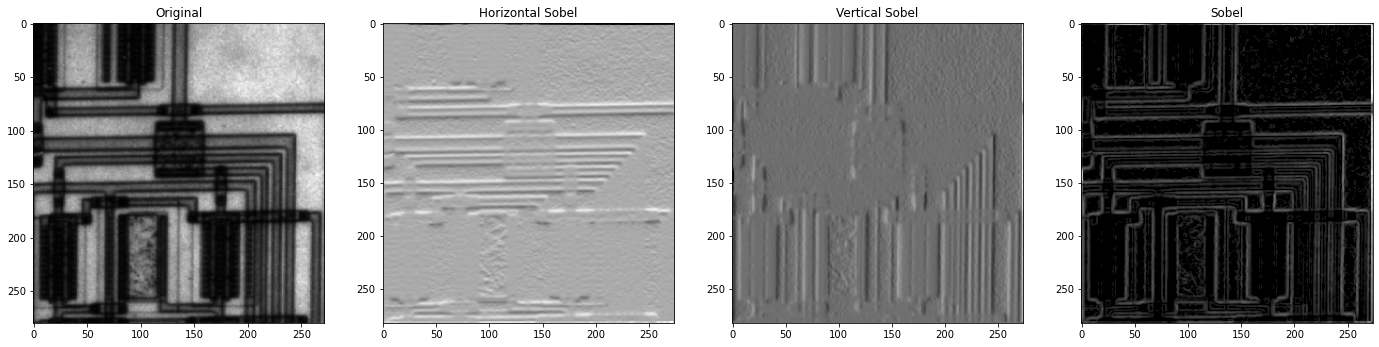

In [49]:
# 2. Custom Sobel (V-H-Both)

hx = [[-1, -2, -1], 
      [0, 0, 0], 
      [1, 2, 1]]

hy = [[-1, 0, 1], 
      [-2, 0, 2], 
      [-1, 0, 1]]

imgSobelH = convolve2d(img, hx)

imgSobelV = convolve2d(img, hy)

imgSobel = np.sqrt(np.square(imgSobelH) + np.square(imgSobelV))
imgSobel *= (255.0 / imgSobel.max())

imgSobel[imgSobel < 20] = 0;

show_images([img, imgSobelH, imgSobelV, imgSobel], ["Original", "Horizontal Sobel", "Vertical Sobel", "Sobel"])



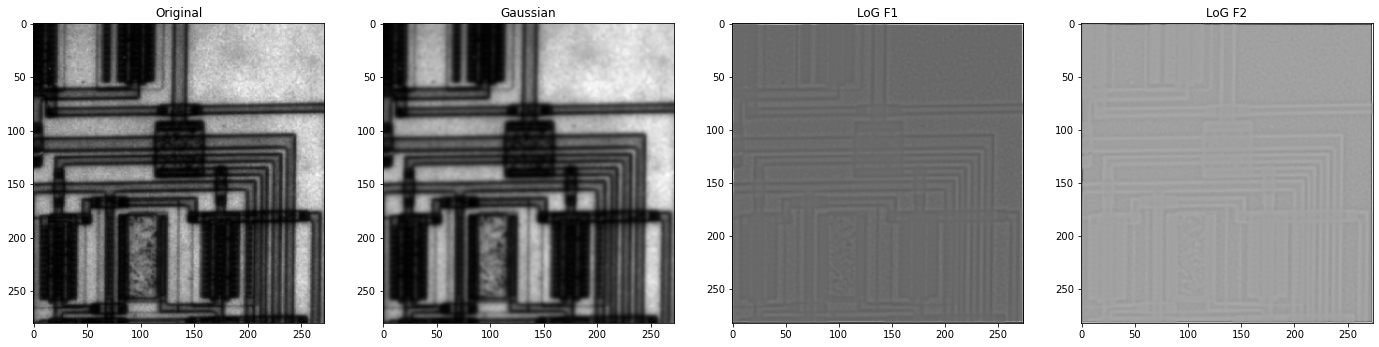

In [106]:
# 3. Custom LoG
thres= 20

f1 = [[-1, -1, -1], 
      [-1, 8, -1], 
      [-1, -1, -1]]

f2 = [[0, 1, 0], 
      [1, -4, 1], 
      [0, 1, 0]]

imgGaussian = gaussian(img, sigma=1)


imgLoGF1 = convolve2d(imgGaussian, f1)

imgLoGF2 = convolve2d(imgGaussian, f2)

#imgLoGF1 += np.abs(imgLoGF1.min())

#imgLoGF2 += np.abs(imgLoGF2.min())

imgLoGF1 *= (255.0 / imgLoGF1.max())

imgLoGF2 *= (255.0 / imgLoGF2.max())

#imgLoGF1 = 255 - imgLoGF1

#imgLoGF2 = 255 - imgLoGF2

#imgLoGF1[imgLoGF1 < thres] = 0;

#imgLoGF2[imgLoGF2 < thres] = 0;

show_images([img, imgGaussian, imgLoGF1, imgLoGF2], ["Original", "Gaussian", "LoG F1", "LoG F2"])


In [ ]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''